#  Question 2

Show that gradient vectors of
$$E(w) = \sum_{n=1}^{N} \{{t_{n}log(y_{n}) + (1-t_{n})log(1-y_{n})}\} -\frac{1}{2}\lambda||w||^2 $$

is given by 

$$\nabla_ E(w) = \sum_{n=1}^{N} (t_{n} -y_{n})x_{n} =X^\top(t-y)-\lambda w$$

First we will calculate the derivatives of the sum which are:  

$$ \frac {t_{n}}{y_{n}} - \frac {1-t_{n}}{1-y_{n}}  = \frac {t_{n}y_{n}(1-y_{n})}{y_{n}} - \frac {(1-y_{n})y_{n}(1-t_{n})}{(1-y_{n})}$$

$$ \Downarrow $$

$$t_{n}(1-y_{n}) - (1-t_{n})y_{n}  = t_{n} -  y_{n}$$ 

So we have:

$$E(w) = \sum_{n=1}^{N} \{{t_{n}log(y_{n}) + (1-t_{n})log(1-y_{n})}\} -\frac{1}{2}\lambda ||w||^2 $$
$$ \Downarrow $$

$$\nabla_ E(w) = \sum_{n=1}^{N} (t_{n} -y_{n})x_{n} =X^\top(t-y)-\lambdaw  $$ 

In [1]:
import numpy as np
from math import exp
import math
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline
train_data = np.loadtxt('ml_hw1\data2Tr.txt')
Xtest = np.loadtxt('ml_hw1\data2Ts.txt')   # [ 1.   ,  0.834589,  0.256806]   is the first row

Organize our data and keep a copy of X (X_old) for plotting purposes. $$X(input)$$ is the first two column of train_data, $$t(output)$$ is the third column of train_data. 

In [2]:
X = train_data[:,0:2]
t = train_data[:,2]
#Keep a reference of X and Xtest before adding the ones for easy plotting purposes
Xtest_old = np.loadtxt('ml_hw1\data2Ts.txt')   # [ 0.834589,  0.256806] is the first row
X_old = train_data[:,0:2]   # [ 0.512909,  0.940407] is the first row

In [3]:
N, D = X.shape

In [4]:
Ntest=Xtest.shape[0]

Add 1 as the first for both the training input and test inputs

In [5]:
X = np.c_[np.ones(len(X)),X]
Xtest = np.c_[np.ones(len(Xtest)),Xtest]

Initial w for the gradient ascent, lambda variable, and options list 

In [6]:
winit = np.zeros(D+1)
l = 0.0 
options = [500,exp(1e-6),8/N]
print(winit)

[ 0.  0.  0.]


Definition of required functions 

In [7]:
def sigmoid(z):
    yx = 1.0/(1+np.exp(-z))
    return yx

def ml_logregTrain(t,X,l,winit,options):
    w = winit
    iterations = options[0]
    tol = options[1]
    eta = options[2]
    ewold = float('-inf')
    for it in range(0,iterations):
        yx = np.dot(X,w)
        s = sigmoid(yx)
        ew = sum(np.multiply(t,np.log(s)) + np.multiply((1-t),np.log(1-s))) - np.dot((0.5 * l), np.dot(w.transpose(),w))  
        print('Iteration: {}, Cost function: {}\n'.format(it,ew))
        #if np.absolute(np.subtract(ew,ewold)) < np.float(tol):
        #    break
        gradient = np.dot(X.transpose(),(t-s)) - np.multiply(l,w)
        w += np.multiply(np.float(eta),gradient)
        ewold=ew
    return w 

def ml_logregTest(w, Xtest):
    ytest=sigmoid(np.dot(Xtest,w))
    ttest  = np.round(ytest)
    return ttest, ytest 
#Now train with X,t and test 
w = ml_logregTrain(t, X, l, winit, options)
ttest,ytest = ml_logregTest(w,Xtest)

Iteration: 0, Cost function: -27.725887222397784

Iteration: 1, Cost function: -24.466297411714265

Iteration: 2, Cost function: -22.536511572446166

Iteration: 3, Cost function: -22.116229369707966

Iteration: 4, Cost function: -23.074381449108436

Iteration: 5, Cost function: -25.33374801225194

Iteration: 6, Cost function: -24.99306597186226

Iteration: 7, Cost function: -24.835293143728418

Iteration: 8, Cost function: -21.399105758000164

Iteration: 9, Cost function: -19.558810626741636

Iteration: 10, Cost function: -16.907541699538584

Iteration: 11, Cost function: -15.286912148987991

Iteration: 12, Cost function: -13.823184823072978

Iteration: 13, Cost function: -12.891475520245152

Iteration: 14, Cost function: -12.205873931821333

Iteration: 15, Cost function: -11.755709046930185

Iteration: 16, Cost function: -11.431865277310434

Iteration: 17, Cost function: -11.190401370425883

Iteration: 18, Cost function: -10.993102277392428

Iteration: 19, Cost function: -10.821655194

In [8]:
maxX=X[:,1].max()
minX=X[:,1].min()

Below are the plots. To plot X data if t =1 or if t=0, I decided to zip t and X_old and use an if.     Sample row of zipped array is "(1.0, array([ 1.      ,  0.460484,  0.415557]))" Where 1.0 is t, and array that follows is with the 1's added and X datapoint coordinates.  So now to plot, I have from the above ask to return :  
[ i [ 1 ][ 1 ] for i in zip(t,X) if i[ ::2 ][ 0 ] == 0.]   for X1,1     and t=0.  
[ i [ 1 ][ 2 ] for i in zip(t,X) if i[ ::2 ][ 0 ] == 1.]   for X1,2     and t=1.

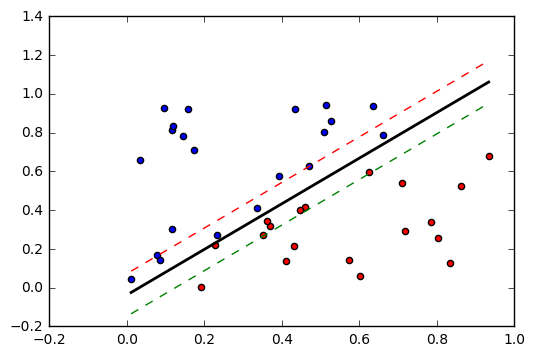

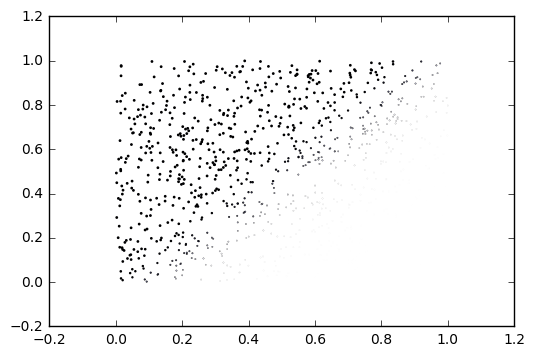

In [9]:
#plt.scatter(X[:,1:3],c='red')
plt.scatter([i[1][0] for i in zip(t,X_old) if i[::2][0] == 0.],[i[1][1] for i in zip(t,X_old) if i[::2][0] == 0.])
plt.scatter([i[1][0] for i in zip(t,X_old) if i[::2][0] == 1.],[i[1][1] for i in zip(t,X_old) if i[::2][0] == 1.] ,c='red')

plt.plot([minX,maxX],-np.float(w[0]/w[2]) - np.dot((w[1]/w[2]),[minX,maxX]),lw='2',c='black')
#p=0.1 and p=0.9 decision boundaries
plt.plot([minX,maxX],-np.float(np.log(0.9/0.1)/w[2]) -np.float(w[0]/w[2]) - np.multiply((w[1]/w[2]),[minX,maxX]),'--',lw='1',c='red')
plt.plot([minX,maxX],-np.float(np.log(0.1/0.9)/w[2]) -np.float(w[0]/w[2]) - np.multiply((w[1]/w[2]),[minX,maxX]),'--',lw='1',c='green')

#plot probabilities in the test data
fig2=plt.figure()
for n in range(1,Ntest):
    plt.scatter(Xtest_old[n][0],Xtest_old[n][1],[1-ytest[n],ytest[n]])

In [10]:
#[i[1][1:3] for i in zip(t,X) if i[::2][0] == 0.0]
#[i[1][1:3] for i in zip(t,X) if i[::2][0] == 1.0]
#[i[1][0] for i in zip(t,X_old) if i[::2][0] == 0.]
#[i[1][2]-0.5 for i in zip(t,X) if i[::2][0] == 1.]